In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#EDA

Text(0, 0.5, 'Dilution')

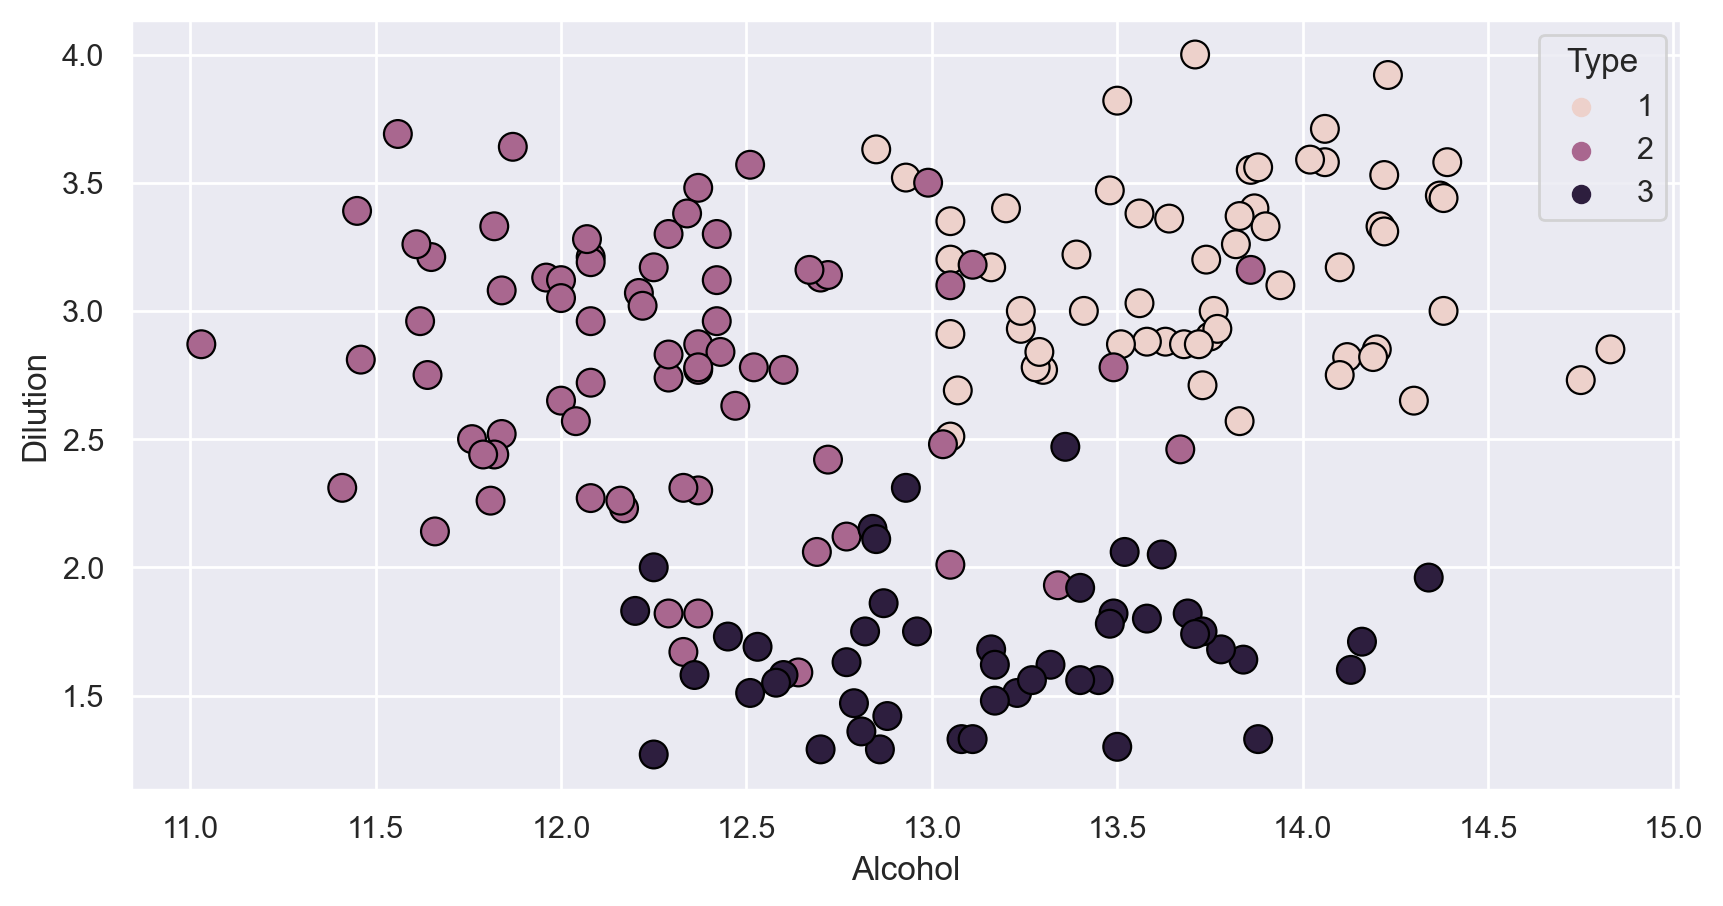

In [4]:
sns.scatterplot(x = df['Alcohol'], y = df['Dilution'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Alcohol')
plt.ylabel('Dilution')

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Type'),
  Text(2, 0, 'Alcohol'),
  Text(3, 0, 'Malic'),
  Text(4, 0, 'Ash'),
  Text(5, 0, 'Alcalinity'),
  Text(6, 0, 'Magnesium'),
  Text(7, 0, 'Phenols'),
  Text(8, 0, 'Flavanoids'),
  Text(9, 0, 'Nonflavanoids'),
  Text(10, 0, 'Proanthocyanins'),
  Text(11, 0, 'Color'),
  Text(12, 0, 'Hue'),
  Text(13, 0, 'Dilution'),
  Text(14, 0, 'Proline')])

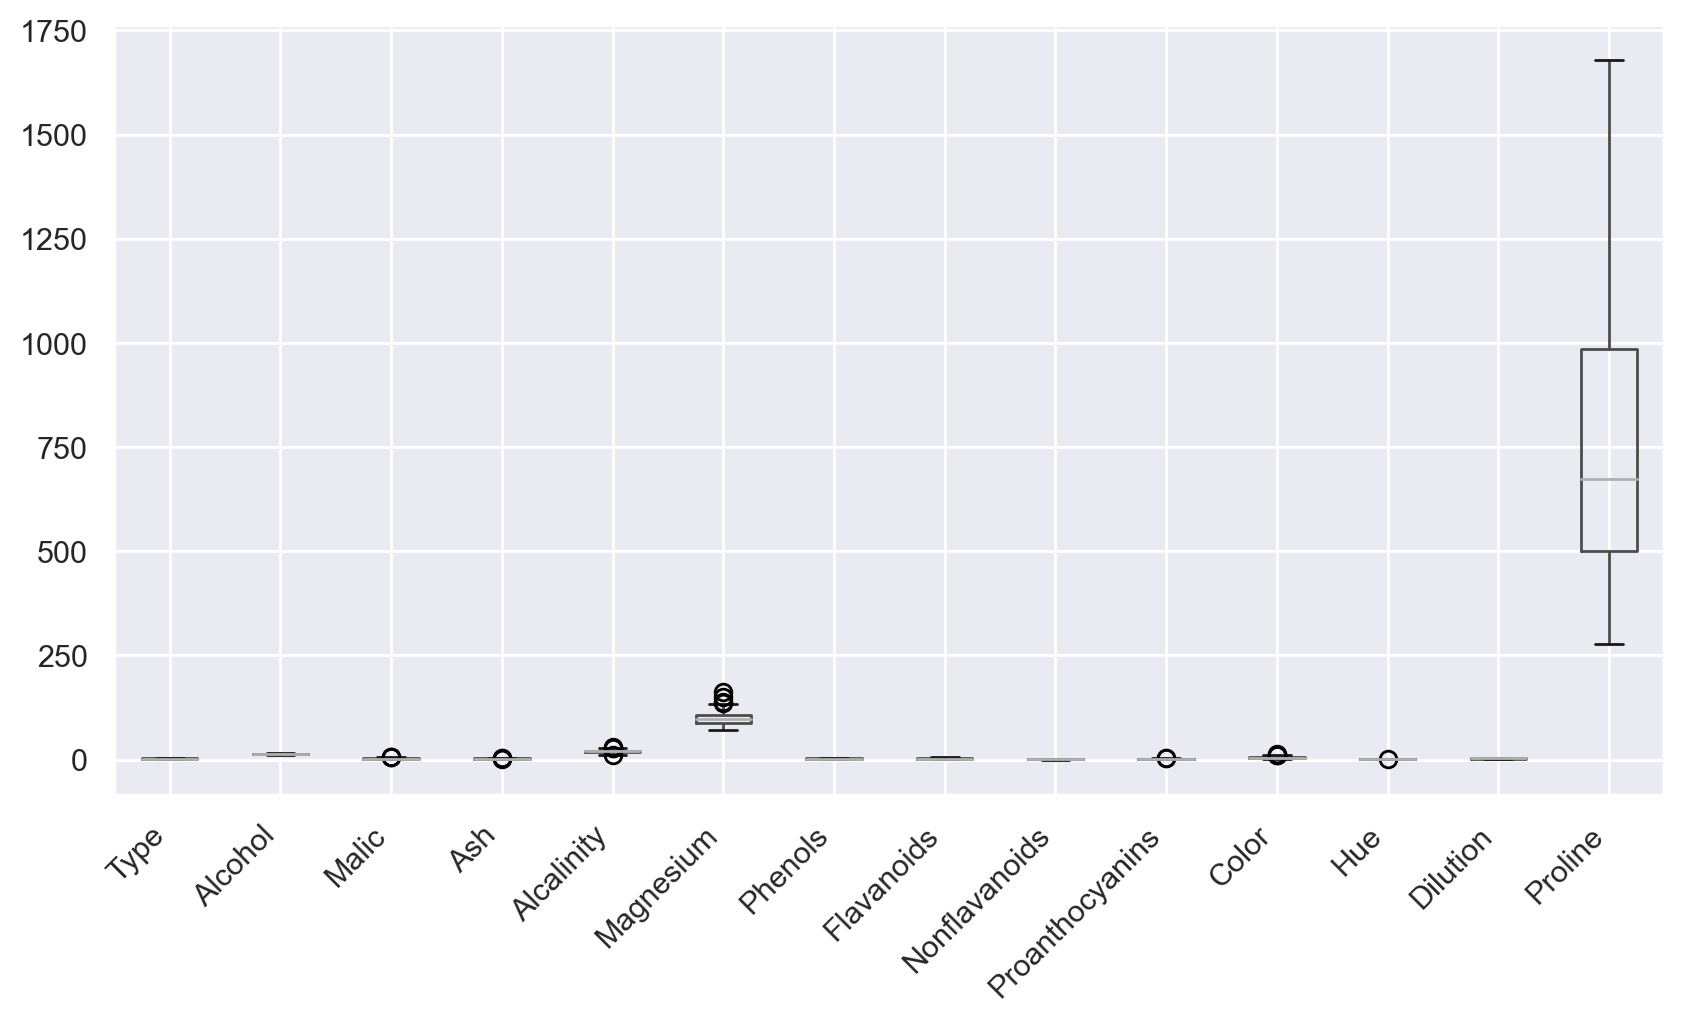

In [9]:
df.boxplot()
plt.xticks(rotation=45, ha='right')

In [10]:
#Outlier detection function
def outlier_detection(data,colname):
    for col in colname:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)
    
        df[col]=np.where(df[col] > upper,upper,np.where(df[col] < lower,lower,df[col]))

In [11]:
outlier_detection(df,df.columns)

<AxesSubplot:>

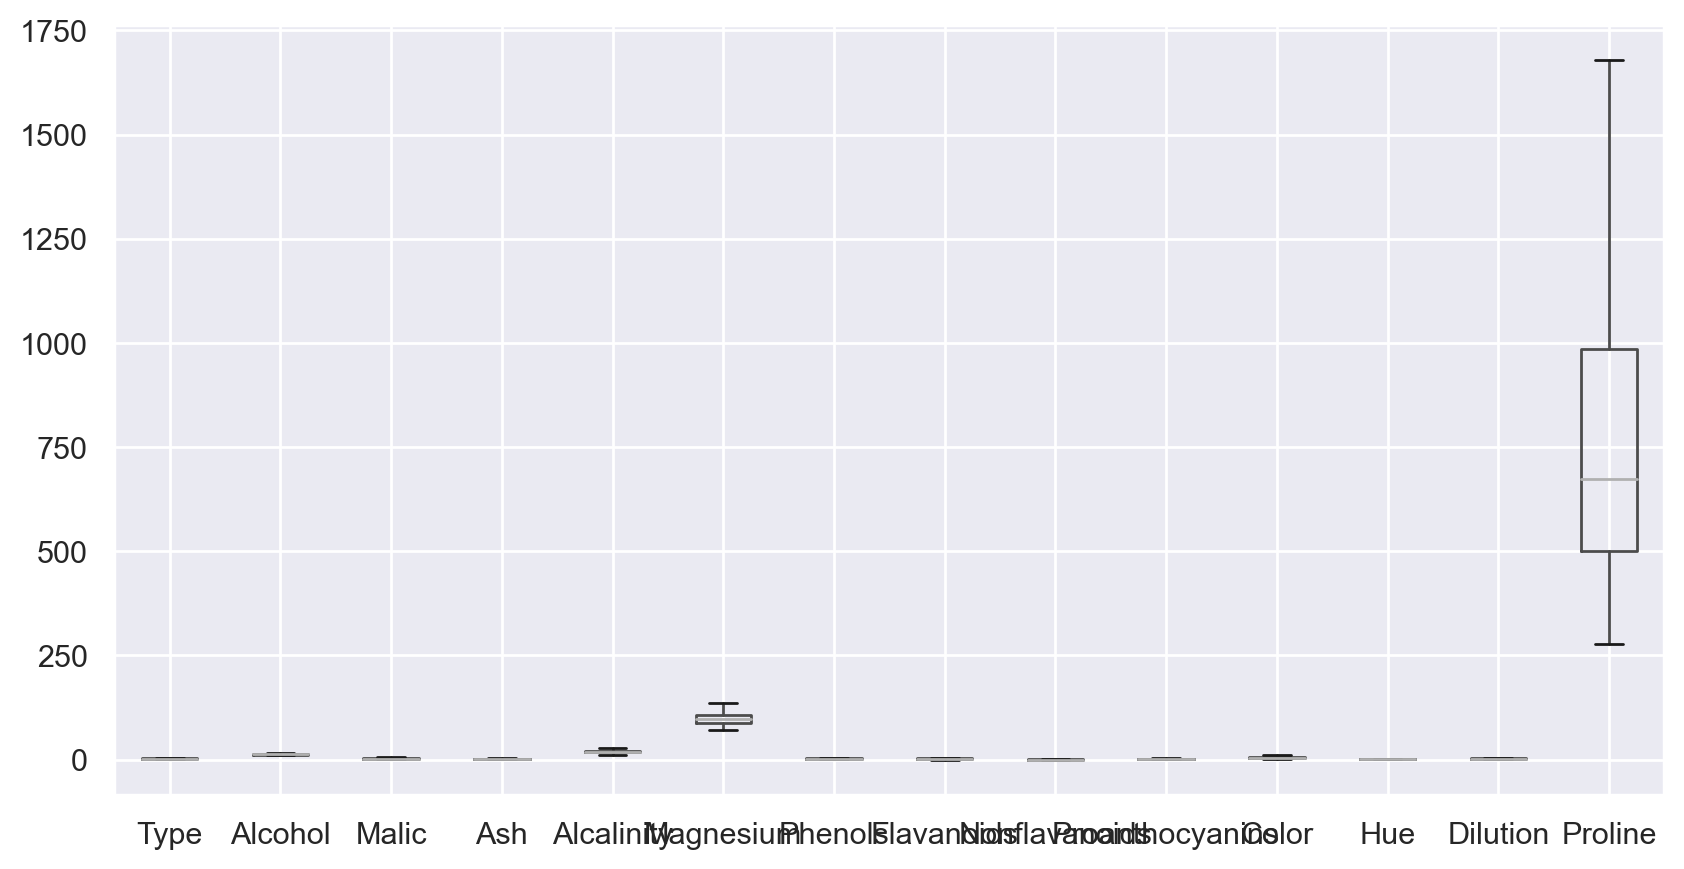

In [12]:
df.boxplot()

In [13]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


# PCA

In [14]:
x=df.iloc[:,:]
x

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3.0,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [15]:
sc = StandardScaler()

x = sc.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-9.056426e-16,-8.619821e-16,1.883637e-16,-4.465841e-16,-2.681999e-16,-1.702758e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,1.503167e-16,-1.197544e-16,7.484650e-18,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-1.213944e+00,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,7.996036e-02,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,1.373864e+00,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,1.373864e+00,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515e+00,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


In [16]:
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [17]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.561968,-1.528967,-0.130558,-0.102725,0.749767,-0.241582,0.687821,0.011639,0.512705,1.068876,-0.371279,0.559975,-0.391569,0.195619
1,-2.544330,0.329993,-2.041603,-0.448040,-0.193861,-0.959958,-0.007630,0.981717,-0.320779,0.020547,-0.125640,0.350435,-0.185027,0.137040
2,-2.806546,-1.042225,1.016791,0.740693,-0.410847,0.481234,0.455990,-0.414297,-1.213945,-0.070917,-0.292712,0.045202,0.047917,-0.056468
3,-3.944287,-2.793264,-0.154956,0.634237,-0.235032,0.266787,-0.403404,0.681048,0.043371,0.118619,0.682974,-0.354389,-0.500658,0.003967
4,-1.415866,-0.953430,2.117093,-0.479292,0.254285,-0.575020,0.492906,0.392037,0.216243,0.128434,-0.573345,-0.134190,0.313438,-0.498089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.575821,-2.165115,-0.378914,0.731787,-0.921869,-1.039551,0.611655,-0.171300,0.100215,-0.329309,0.112341,0.087508,-0.239865,0.096021
174,2.951568,-1.793183,0.210665,0.422008,0.142318,-0.013560,0.131525,-0.575910,-0.012272,-0.246623,0.238265,-0.314203,-0.153762,-0.031829
175,3.019601,-2.860911,-0.975719,0.509405,1.123057,0.094408,0.892320,0.019600,0.036757,-0.199549,0.599992,0.656853,0.030509,-0.057895
176,2.739308,-2.390595,-0.562449,-0.479537,0.878447,1.114849,0.896294,0.379681,-0.034488,0.512213,0.348478,0.329841,-0.192037,0.079584


In [18]:
pca.explained_variance_ratio_

array([0.39807866, 0.18209648, 0.1013214 , 0.06619413, 0.05983257,
       0.04726317, 0.03753501, 0.02554538, 0.02108632, 0.01880492,
       0.01630103, 0.01233512, 0.00955758, 0.00404823])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39807866, 0.58017514, 0.68149655, 0.74769068, 0.80752325,
       0.85478642, 0.89232143, 0.9178668 , 0.93895312, 0.95775804,
       0.97405907, 0.98639419, 0.99595177, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

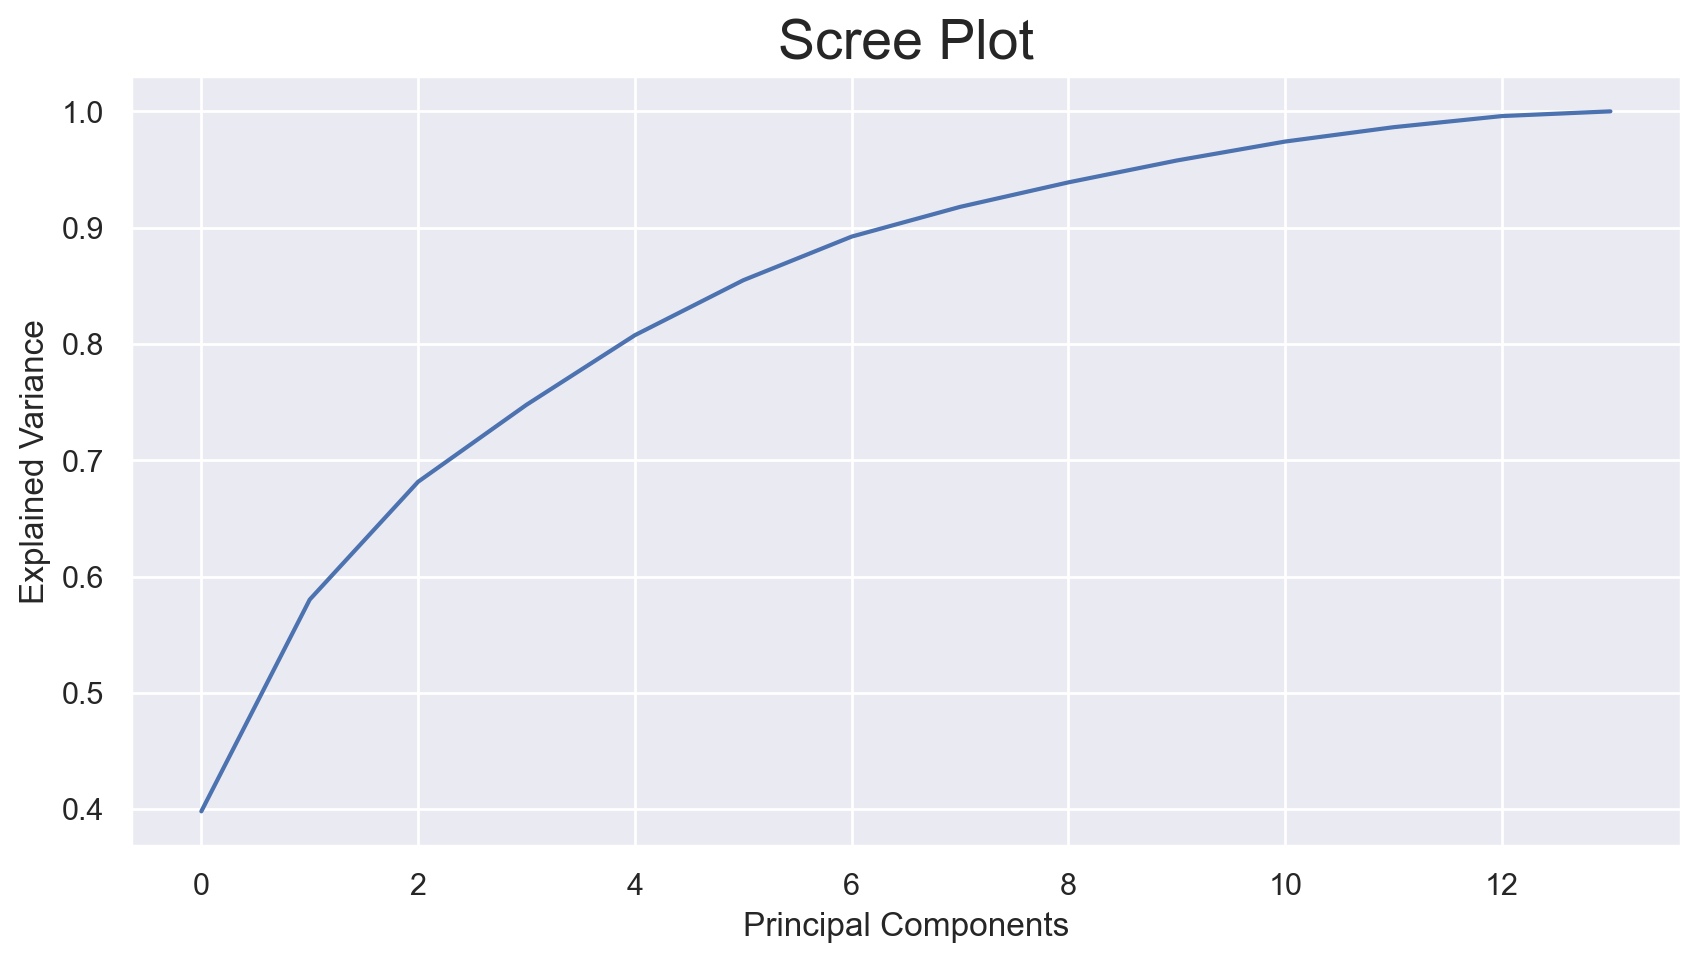

In [20]:
# plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [21]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs

array([[-3.56196816e+00, -1.52896694e+00, -1.30557584e-01],
       [-2.54433006e+00,  3.29992583e-01, -2.04160282e+00],
       [-2.80654586e+00, -1.04222492e+00,  1.01679147e+00],
       [-3.94428663e+00, -2.79326448e+00, -1.54955554e-01],
       [-1.41586551e+00, -9.53430360e-01,  2.11709262e+00],
       [-3.31467737e+00, -2.15987637e+00, -6.03447682e-01],
       [-2.76883800e+00, -1.16001791e+00, -9.57417877e-01],
       [-2.40349271e+00, -1.69343430e+00,  2.13923950e-01],
       [-2.81956282e+00, -8.88750972e-01, -1.77911470e+00],
       [-3.01921539e+00, -7.80940913e-01, -1.00228232e+00],
       [-3.70084217e+00, -1.30750101e+00, -4.11422652e-01],
       [-2.11892156e+00, -5.94496720e-01, -1.17784148e+00],
       [-2.44752356e+00, -6.43424399e-01, -8.56288036e-01],
       [-3.71609766e+00, -1.08602601e+00, -1.19849473e+00],
       [-4.48843580e+00, -2.09514172e+00, -1.26924638e+00],
       [-2.62175728e+00, -1.73411029e+00,  2.69678242e-01],
       [-2.49498019e+00, -2.40231306e+00

In [22]:
data = pd.DataFrame(pcs,columns=['PC1','PC2','PC3'])
data

,PC1,PC2,PC3
0,-3.561968,-1.528967,-0.130558
1,-2.544330,0.329993,-2.041603
2,-2.806546,-1.042225,1.016791
3,-3.944287,-2.793264,-0.154956
4,-1.415866,-0.953430,2.117093
...,...,...,...
173,3.575821,-2.165115,-0.378914
174,2.951568,-1.793183,0.210665
175,3.019601,-2.860911,-0.975719
176,2.739308,-2.390595,-0.562449


In [23]:
# Hierarchical Clustering

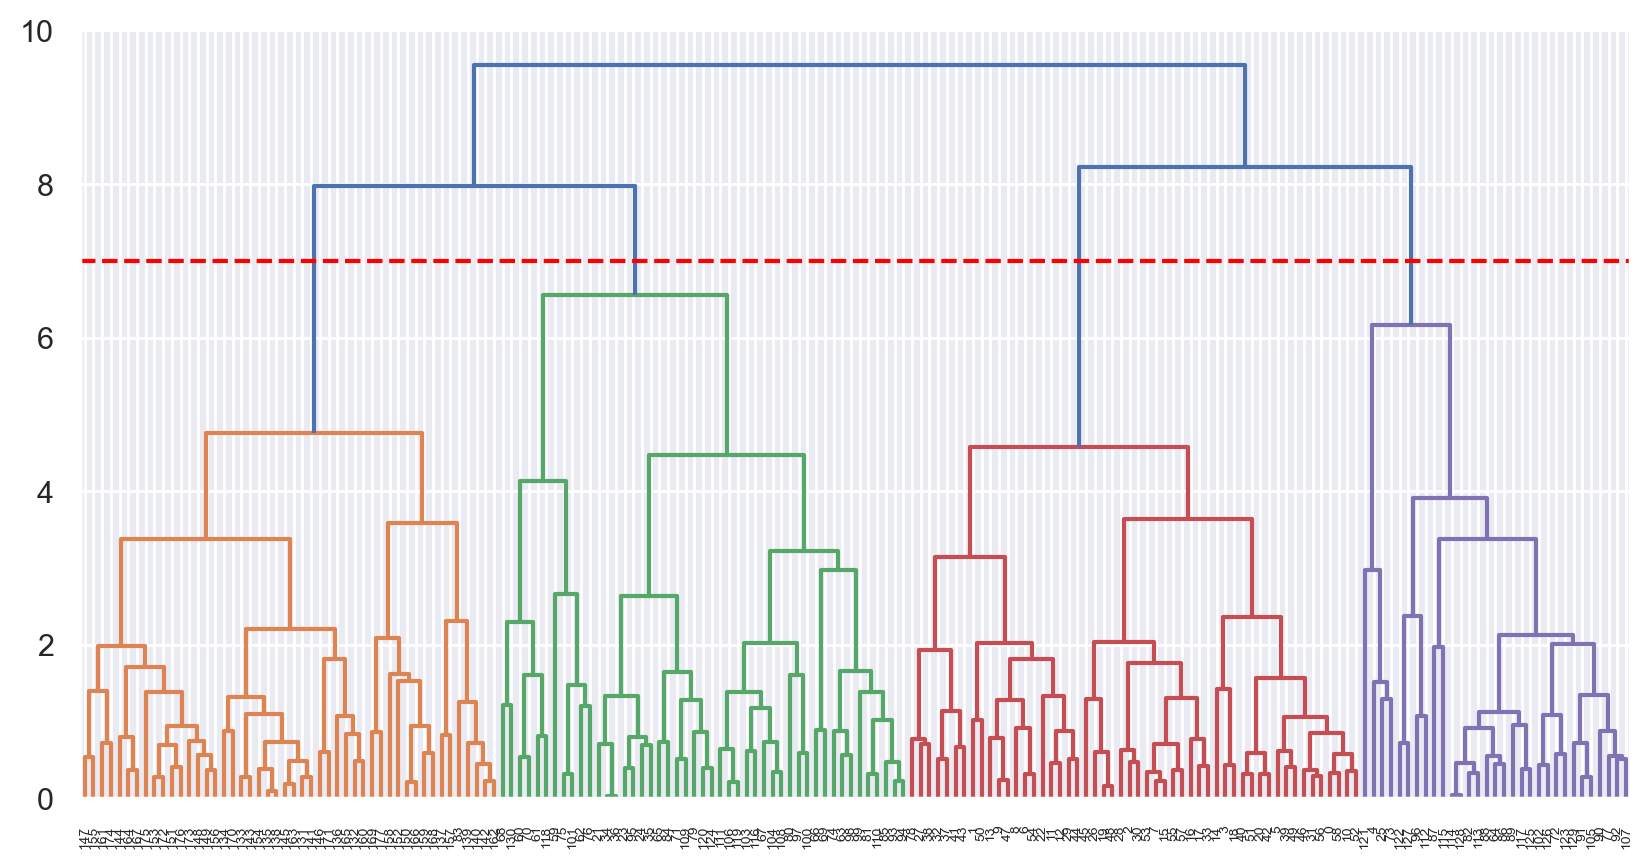

In [27]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(data, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red') 

In [28]:
#Model Building

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)

ypred = hc.fit_predict(data)
ypred

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [30]:
data['cluster'] = ypred  
data

,PC1,PC2,PC3,cluster
0,-3.561968,-1.528967,-0.130558,2
1,-2.544330,0.329993,-2.041603,2
2,-2.806546,-1.042225,1.016791,2
3,-3.944287,-2.793264,-0.154956,2
4,-1.415866,-0.953430,2.117093,3
...,...,...,...,...
173,3.575821,-2.165115,-0.378914,1
174,2.951568,-1.793183,0.210665,1
175,3.019601,-2.860911,-0.975719,1
176,2.739308,-2.390595,-0.562449,1


In [31]:
data.groupby('cluster').agg('mean')

,PC1,PC2,PC3
cluster,,,
0,0.144399,1.835336,0.288182
1,2.977279,-1.109043,-0.252256
2,-2.576814,-0.851619,-0.299132
3,-1.610286,-0.584121,3.446323


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

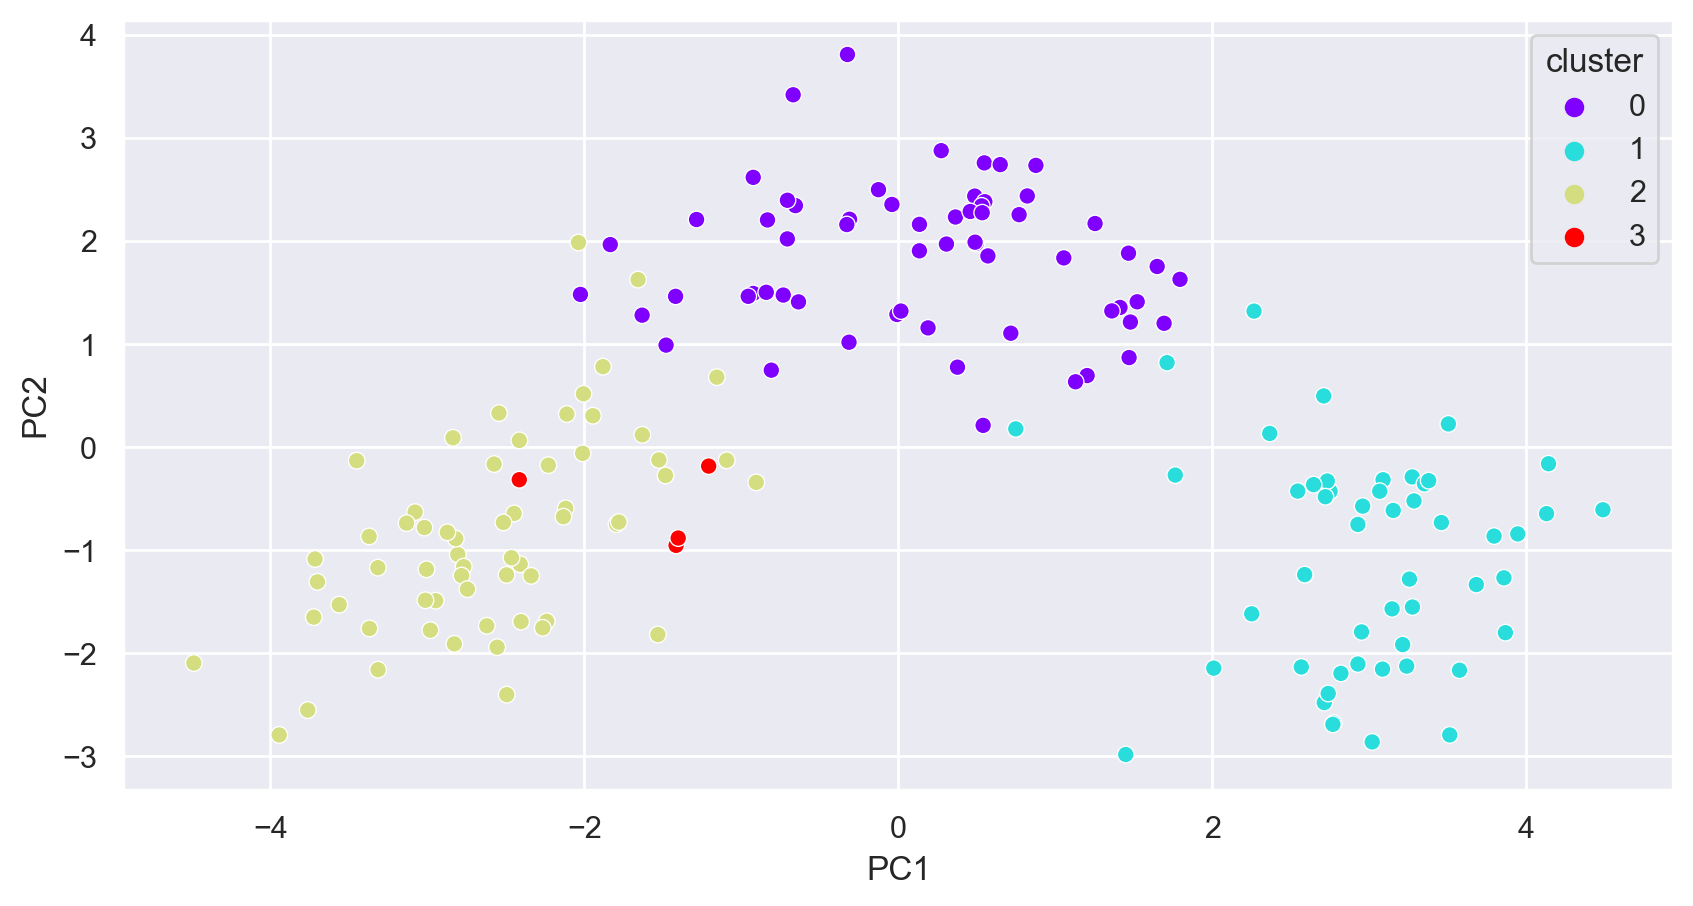

In [32]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],hue=data['cluster'], palette='rainbow')

In [33]:
#Evaluation og Hiearchical clustering

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(data,ypred)

0.5092712244028447

In [35]:
#Kmean clustering

In [36]:
data1= pd.DataFrame(pcs,columns=['PC1','PC2','PC3'])
data1

,PC1,PC2,PC3
0,-3.561968,-1.528967,-0.130558
1,-2.544330,0.329993,-2.041603
2,-2.806546,-1.042225,1.016791
3,-3.944287,-2.793264,-0.154956
4,-1.415866,-0.953430,2.117093
...,...,...,...
173,3.575821,-2.165115,-0.378914
174,2.951568,-1.793183,0.210665
175,3.019601,-2.860911,-0.975719
176,2.739308,-2.390595,-0.562449


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

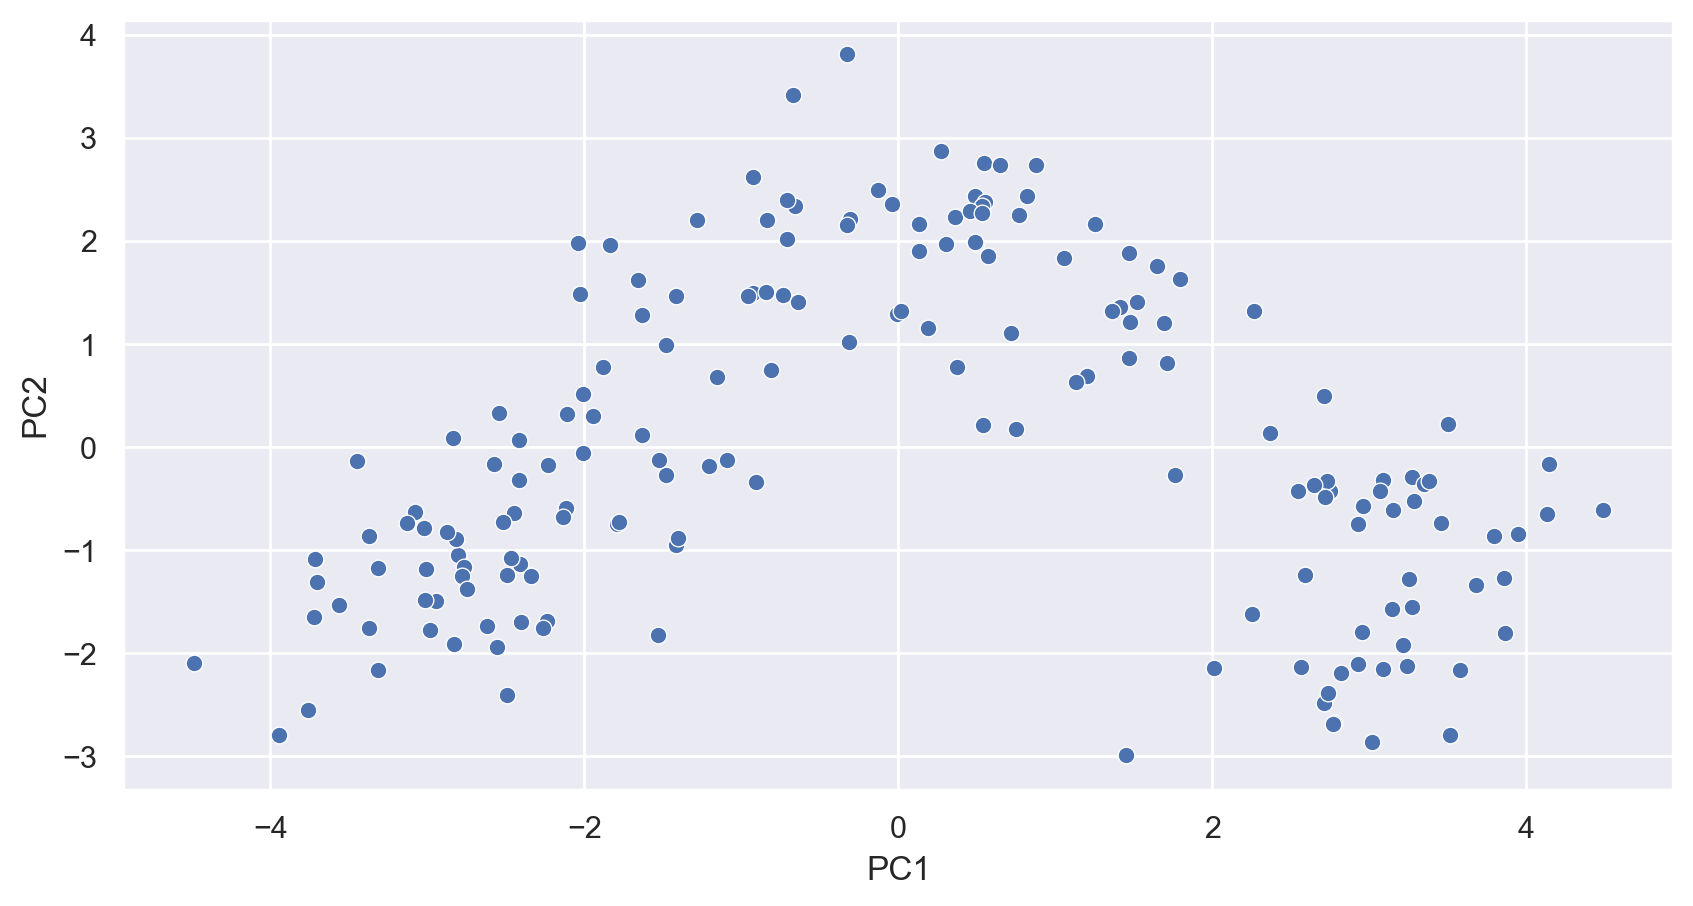

In [37]:
#Data visualization
sns.scatterplot(x= data1['PC1'], y = data1['PC2'])

In [38]:
from sklearn.cluster import KMeans
km = KMeans()
yp = km.fit_predict(data1) 
yp

array([7, 7, 3, 7, 0, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 7, 3, 7, 3,
       3, 3, 3, 0, 3, 3, 3, 7, 3, 7, 3, 3, 3, 3, 3, 3, 2, 7, 7, 3, 7, 3,
       3, 3, 7, 7, 3, 7, 7, 7, 7, 3, 7, 3, 7, 3, 7, 6, 6, 6, 6, 2, 4, 2,
       2, 6, 6, 2, 6, 0, 4, 0, 2, 6, 6, 6, 2, 4, 2, 2, 4, 5, 2, 2, 4, 4,
       4, 4, 6, 4, 6, 2, 2, 3, 4, 2, 2, 2, 2, 6, 4, 6, 2, 4, 6, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 6, 4, 6, 6, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1,
       1, 1])

In [39]:
#cluster centre
km.cluster_centers_

array([[-1.58412515, -0.26936701,  3.15760283],
       [ 2.91602478, -2.19652582,  0.15511914],
       [-1.0899201 ,  1.83470441, -0.43453377],
       [-2.14177305, -0.78956869,  0.31620567],
       [ 0.4983972 ,  1.66779304,  1.18751137],
       [ 3.1644911 , -0.55364493, -0.41279576],
       [ 0.86813663,  1.84953191, -1.14433368],
       [-3.15500962, -1.21861121, -0.75851544]])

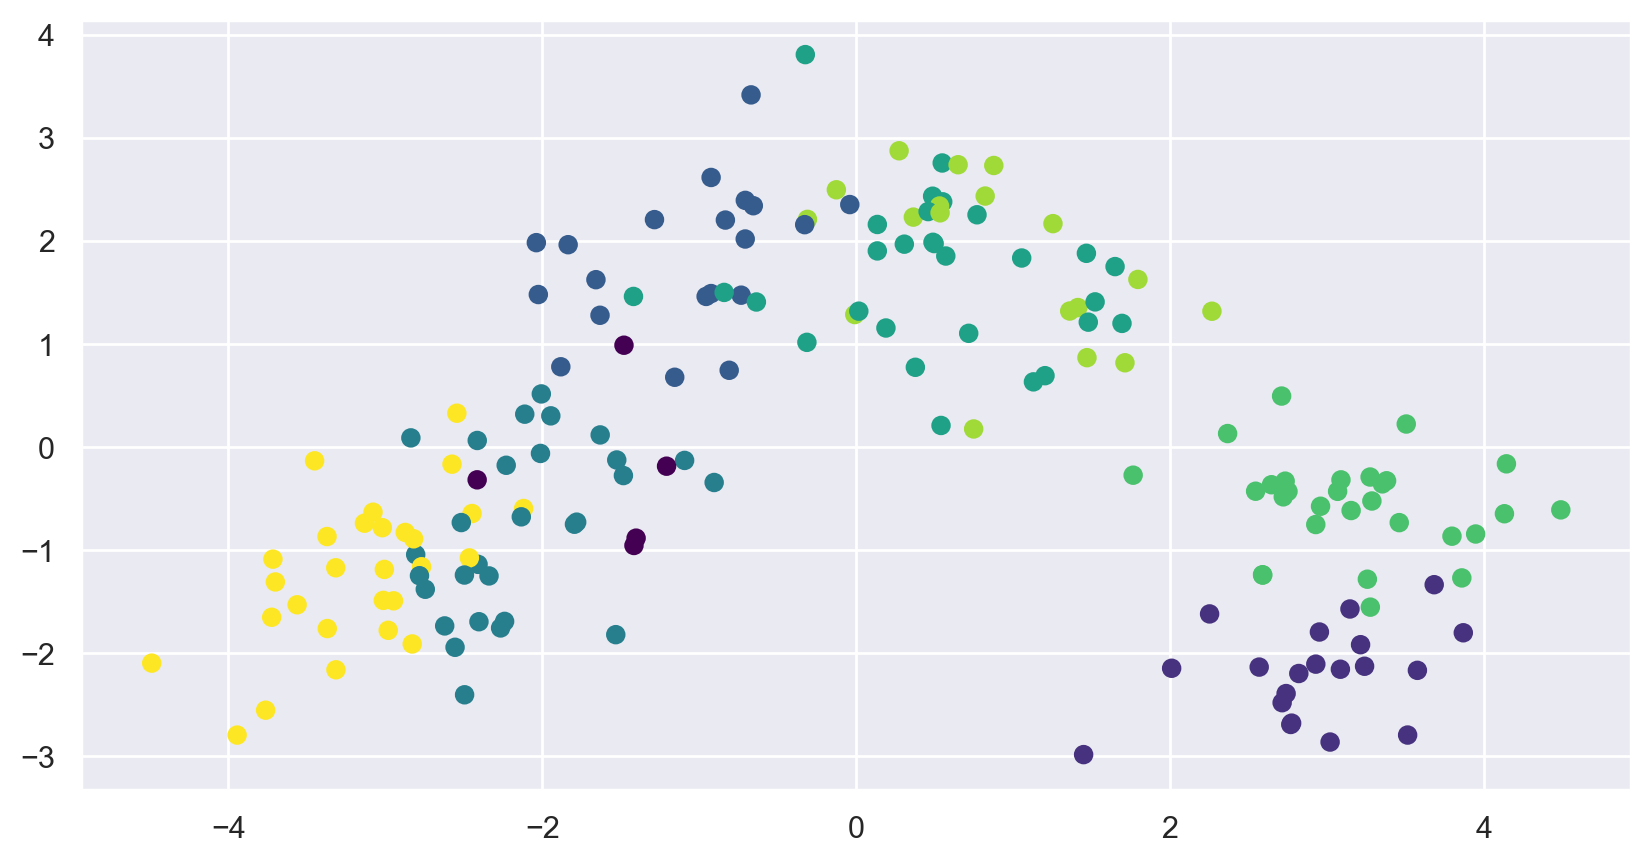

In [40]:
plt.scatter(data1['PC1'],data1['PC2'],c = yp, cmap='viridis')

In [41]:
'''clusters are overlapping,performance of the clustering is not good'''

'clusters are overlapping,performance of the clustering is not good'

In [42]:
km.inertia_

251.50684824580273

In [43]:
# Hyperparamter Tuning

In [44]:
 #Elbow graph 
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data1)
    wcss.append(km.inertia_)

C:\Users\Rajesh Gonnade\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
wcss

[1698.289397042359,
 931.9694103227357,
 489.53897674843586,
 405.1366516865936,
 352.9887562801447,
 313.2565131926262,
 279.39000014920924,
 252.18438072326165,
 228.6514054928822,
 211.84760530409102]

Text(0.5, 1.0, 'Elbow Graph')

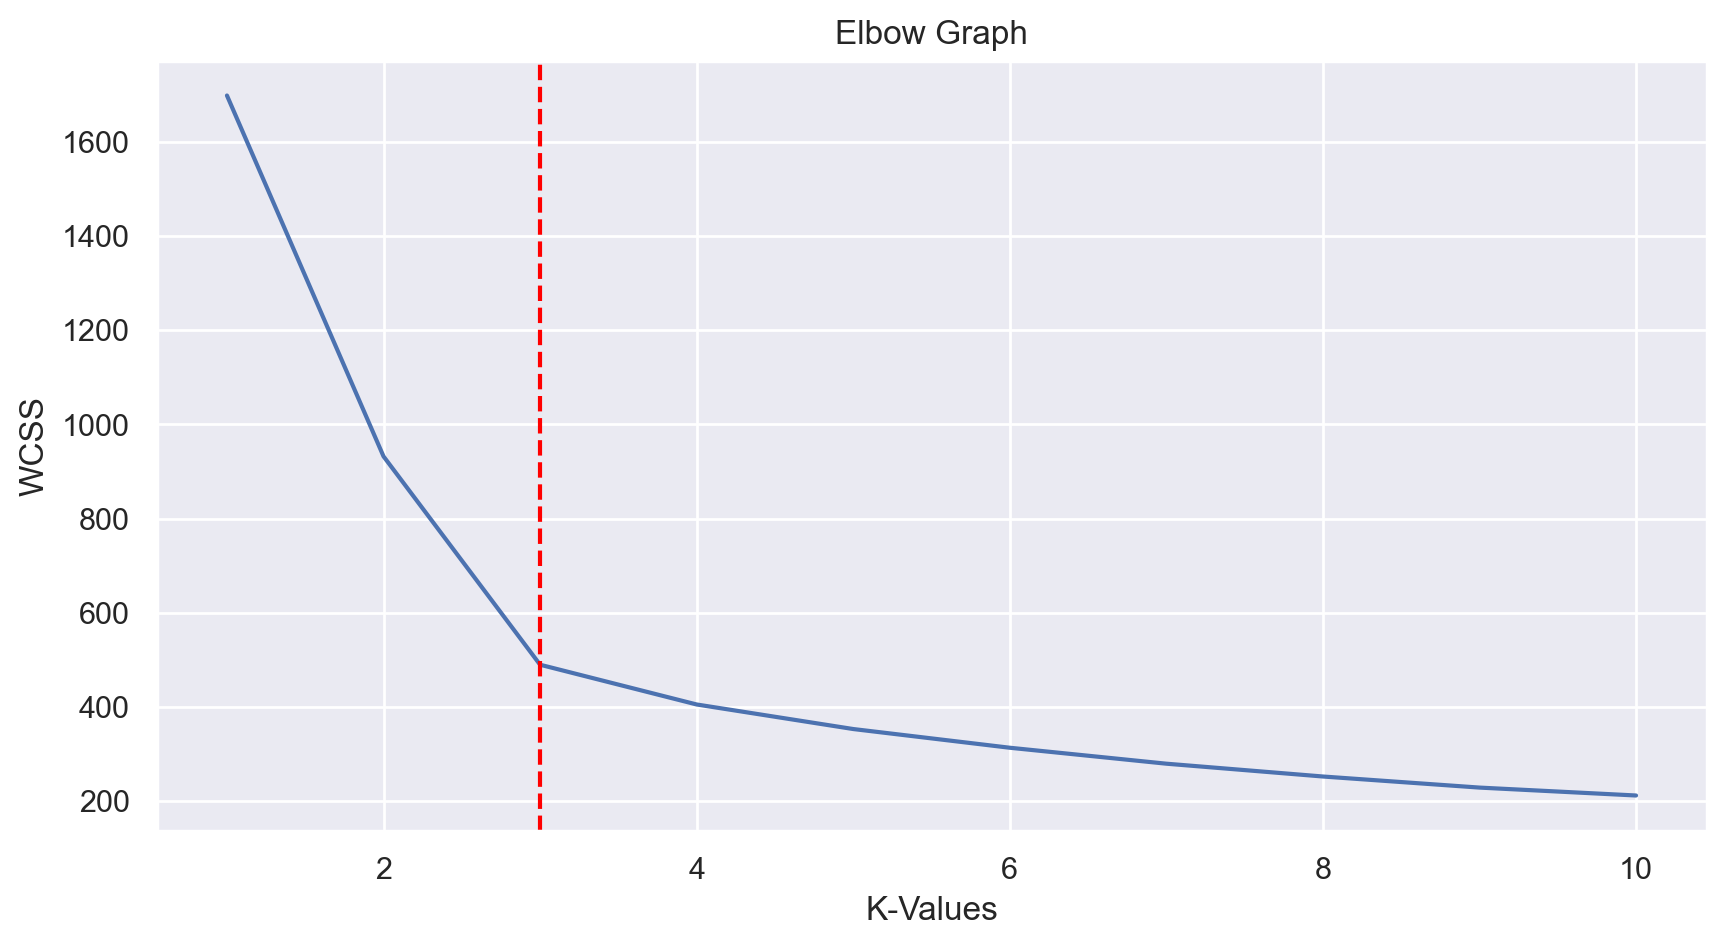

In [46]:
plt.plot(range(1,11),wcss)
plt.axvline(x= 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [47]:
#Final Model
km = KMeans(n_clusters=3)
ypred = km.fit_predict(data1)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [48]:
#Visualize the clusters
km.cluster_centers_

array([[ 0.1296125 ,  1.76956464,  0.12814111],
       [-2.56088346, -0.9447518 ,  0.00456838],
       [ 3.06307627, -1.22420856, -0.18099376]])

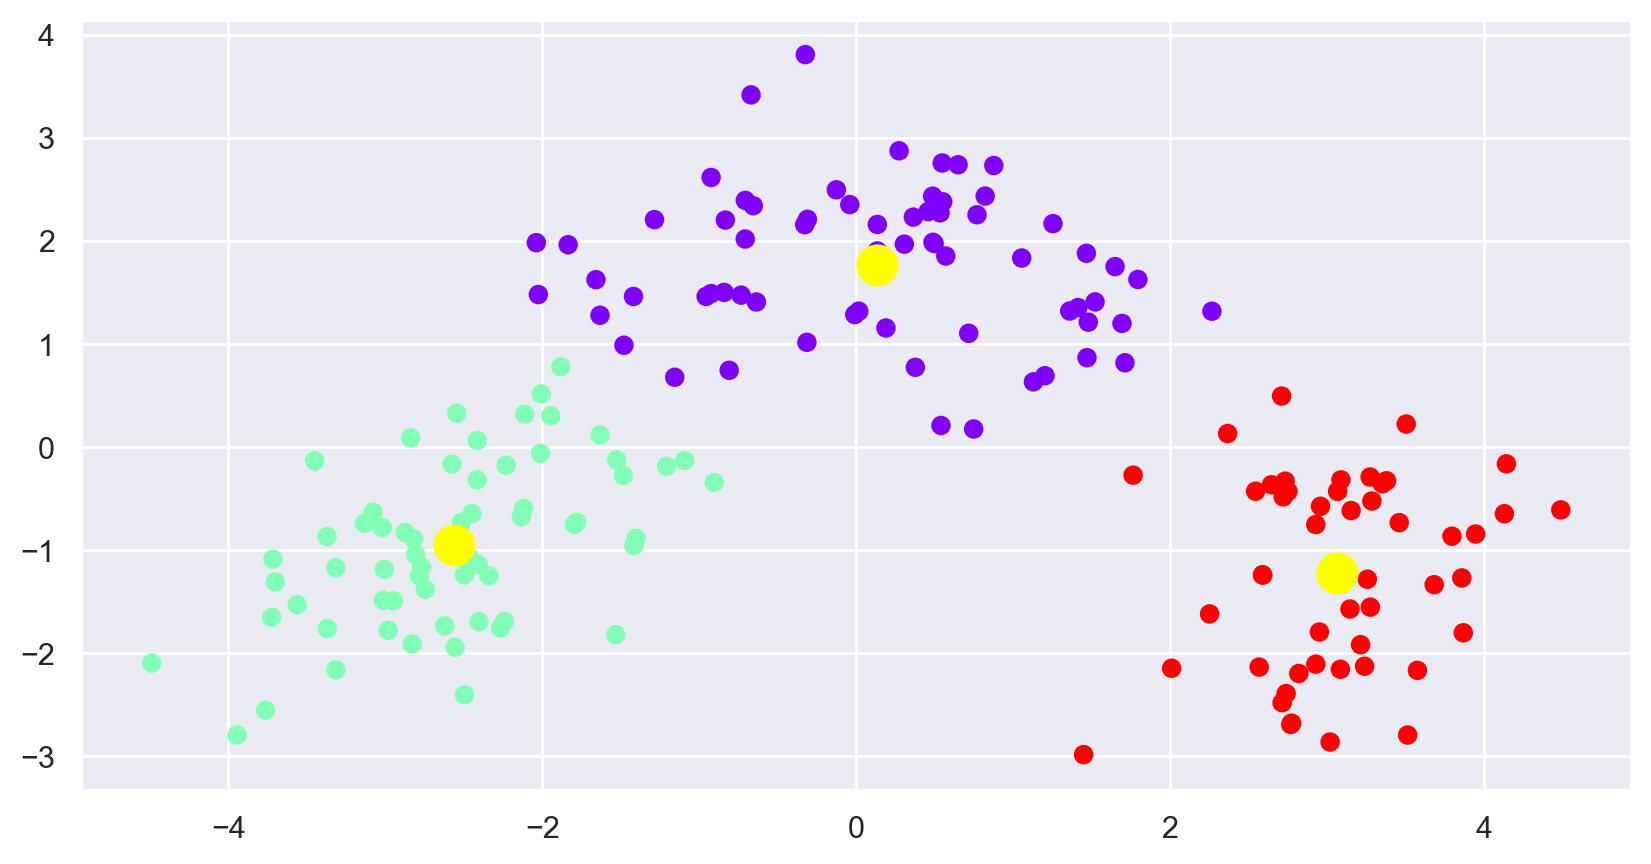

In [49]:
plt.scatter(x=data1['PC1'], y=data1['PC2'],c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

In [50]:
km.inertia_

489.53897674843586

In [51]:
data1['cluster'] = ypred  
data1

,PC1,PC2,PC3,cluster
0,-3.561968,-1.528967,-0.130558,1
1,-2.544330,0.329993,-2.041603,1
2,-2.806546,-1.042225,1.016791,1
3,-3.944287,-2.793264,-0.154956,1
4,-1.415866,-0.953430,2.117093,1
...,...,...,...,...
173,3.575821,-2.165115,-0.378914,2
174,2.951568,-1.793183,0.210665,2
175,3.019601,-2.860911,-0.975719,2
176,2.739308,-2.390595,-0.562449,2


In [52]:
data1.groupby('cluster').agg('mean')

,PC1,PC2,PC3
cluster,,,
0,0.129612,1.769565,0.128141
1,-2.560883,-0.944752,0.004568
2,3.063076,-1.224209,-0.180994


In [53]:
#Evaluation of Kmeans

In [54]:
#Silhouette score
from sklearn.metrics import silhouette_score

In [55]:
silhouette_score(data1,ypred)

0.519787076203329

In [56]:
#Moderate accuracy

# on original data

In [57]:
df=pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<AxesSubplot:xlabel='Alcohol', ylabel='Dilution'>

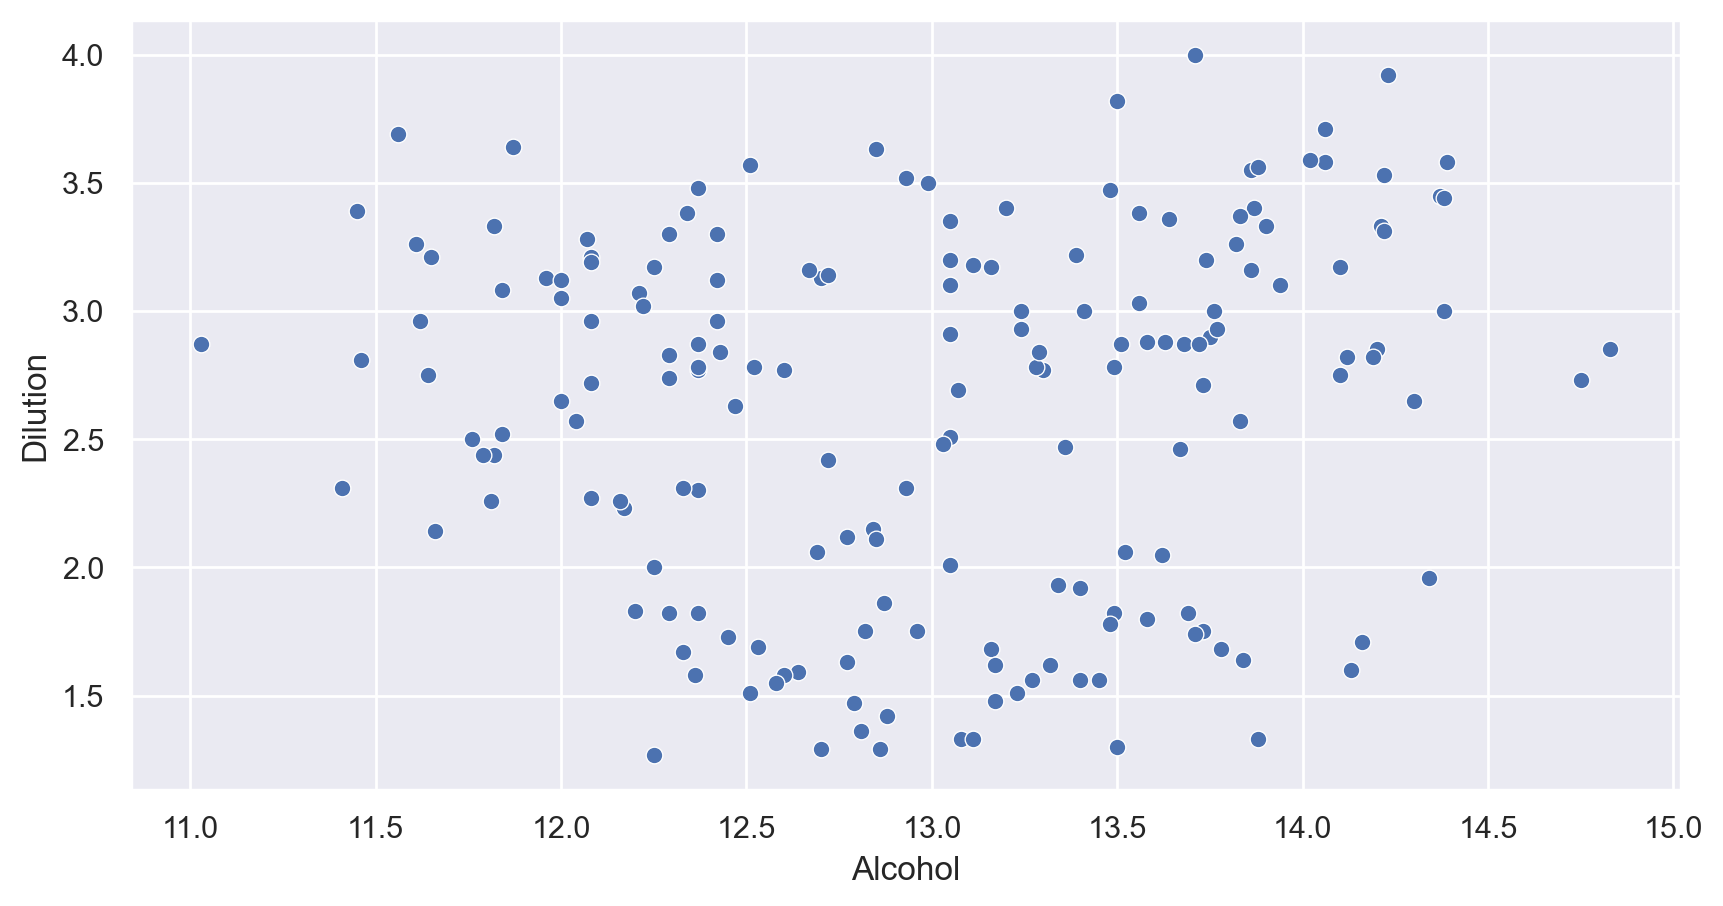

In [58]:
#Data visualization
sns.scatterplot(x= df['Alcohol'], y = df['Dilution'])

In [59]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

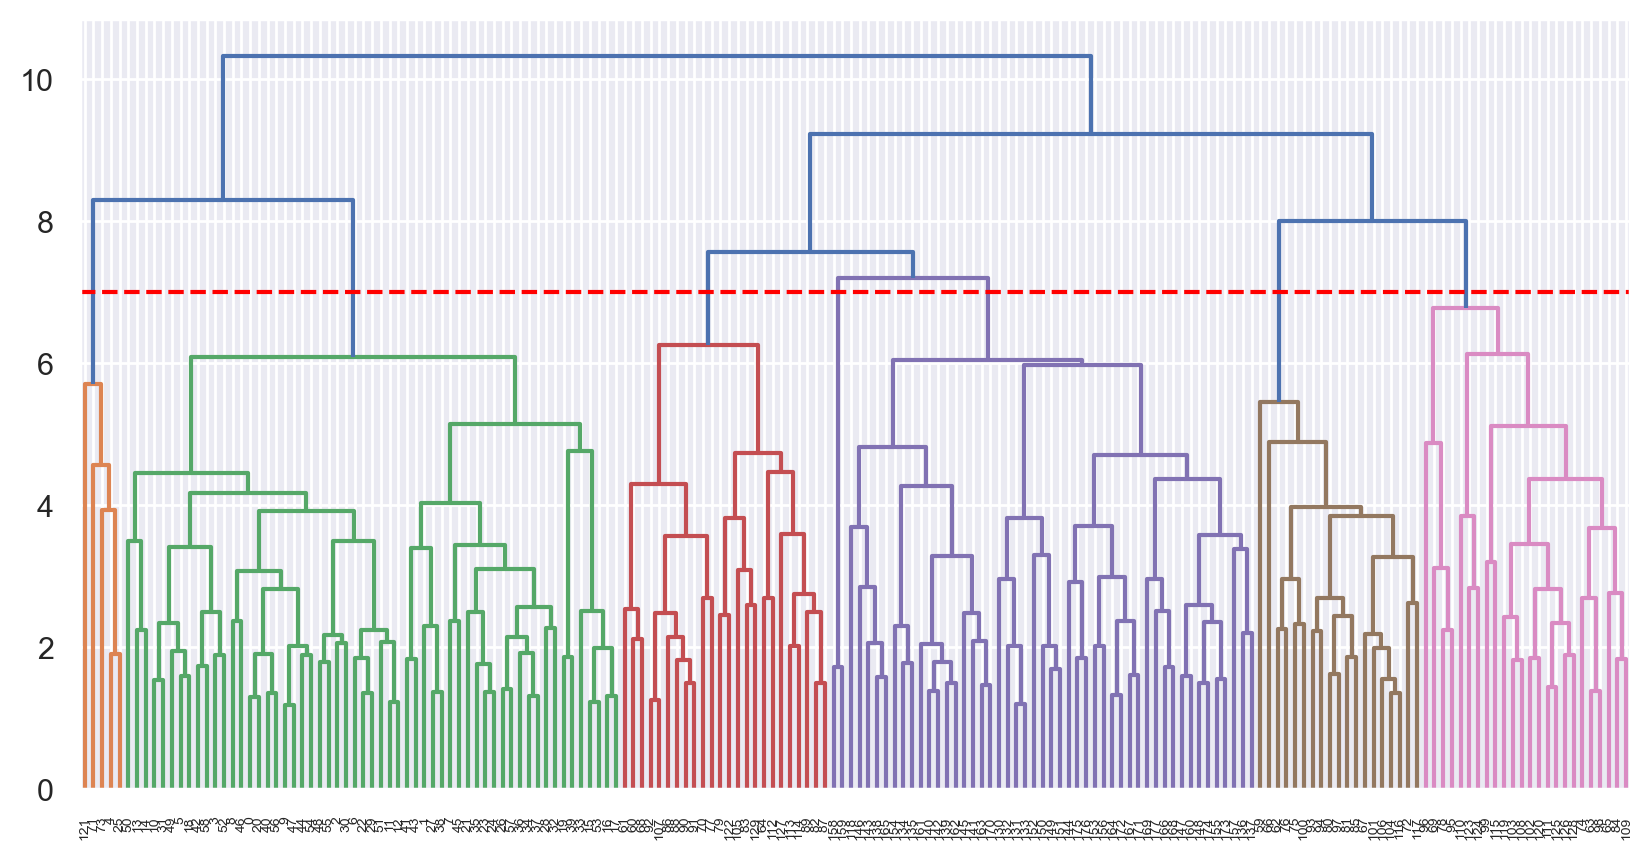

In [60]:
#Model Building
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

In [61]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=7)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 4, 0, 0, 4, 0,
       0, 0, 4, 3, 4, 0, 0, 5, 0, 0, 0, 4, 3, 4, 0, 0, 4, 4, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 0, 5, 4, 0, 0, 0, 0, 4, 0, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2,
       2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 2, 2, 6, 2, 6, 6, 2, 2, 2, 2, 2, 2,
       2, 6], dtype=int64)

In [62]:
df['cluster'] = ypred  
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [63]:
df.groupby('cluster').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,,
0,2.0,12.350000,1.795135,2.124595,19.321622,90.162162,2.452973,2.294054,0.288378,1.689730,3.163784,1.030000,2.960811,486.918919
1,1.0,13.765789,1.999825,2.434912,16.828070,105.824561,2.844561,2.992807,0.285088,1.900351,5.583684,1.061228,3.161053,1127.403509
2,3.0,13.066316,3.423684,2.382632,20.802632,97.157895,1.616053,0.684737,0.466316,1.045000,6.771842,0.697632,1.704211,641.184211
3,2.0,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.837500,1.112500,2.567500,757.500000
4,2.0,12.195357,2.187857,2.367857,21.121429,90.571429,1.974643,1.732143,0.482857,1.403571,2.906786,1.078429,2.526786,513.892857
5,1.5,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000
6,3.0,13.486000,2.992000,2.644000,23.750000,107.500000,1.917000,1.149000,0.376000,1.566000,9.769000,0.626000,1.605000,587.000000


<AxesSubplot:xlabel='Alcohol', ylabel='Dilution'>

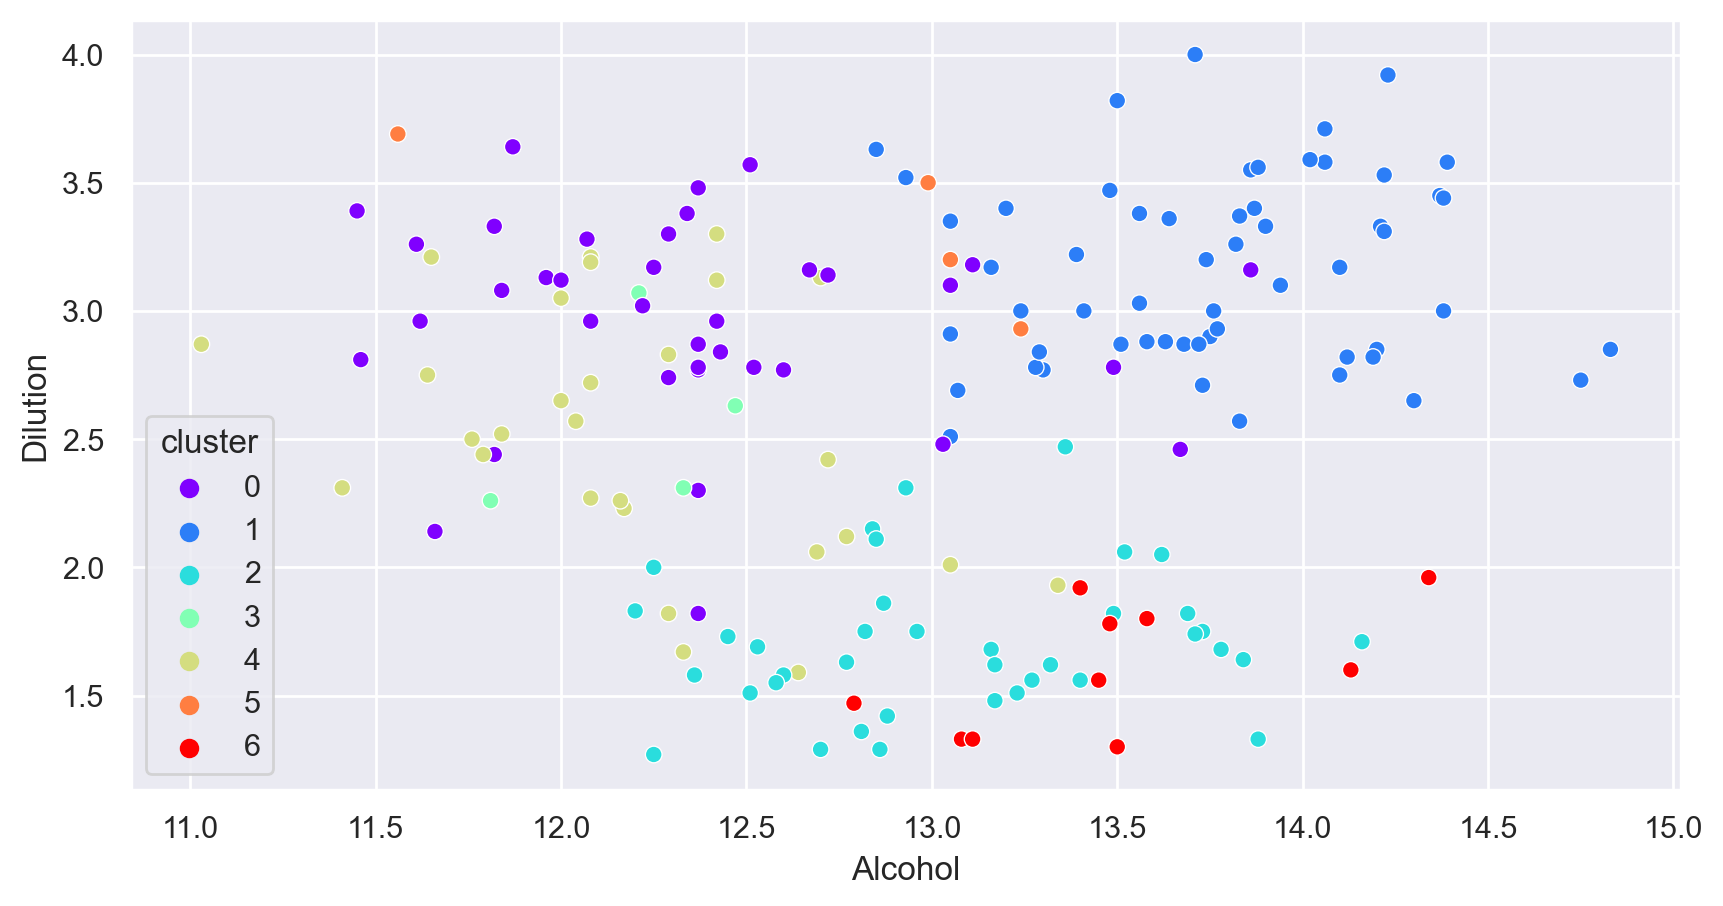

In [64]:
sns.scatterplot(x= df['Alcohol'], y = df['Dilution'], hue=df['cluster'], palette='rainbow')

In [65]:
# kmean

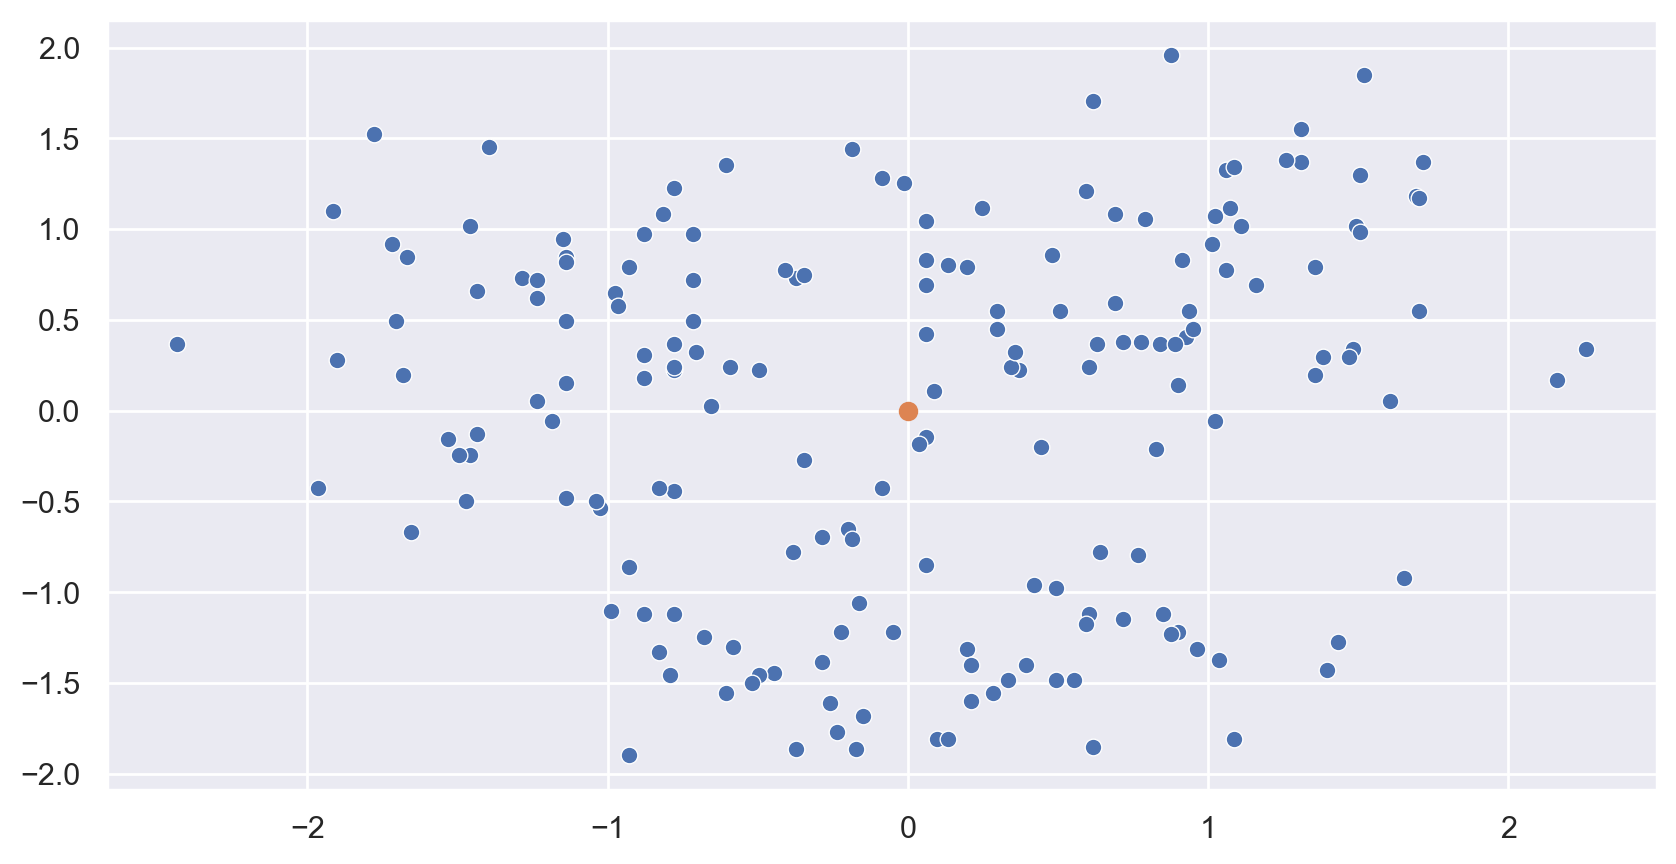

In [66]:
sns.scatterplot(x = x[:,1], y = x[:,12])
plt.scatter(x[:,1].mean(),x[:,12].mean())

In [67]:
#Model Building

In [68]:
from sklearn.cluster import KMeans
km = KMeans()
yp = km.fit_predict(x) 
yp

array([4, 4, 4, 4, 1, 4, 4, 7, 4, 4, 4, 7, 7, 4, 4, 7, 7, 7, 4, 4, 4, 7,
       7, 7, 7, 1, 7, 7, 7, 4, 7, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 4, 2,
       4, 7, 4, 4, 4, 4, 4, 7, 4, 7, 4, 4, 4, 7, 4, 6, 3, 3, 6, 6, 3, 3,
       6, 6, 3, 6, 3, 1, 6, 1, 6, 6, 6, 3, 6, 2, 6, 6, 3, 0, 2, 6, 3, 3,
       3, 3, 3, 3, 3, 2, 6, 1, 1, 6, 6, 2, 6, 6, 2, 6, 6, 3, 6, 3, 6, 2,
       2, 2, 3, 3, 3, 3, 6, 6, 0, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 5, 5,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, 5, 5,
       5, 0, 5, 0, 5, 5, 0, 0, 0, 0, 5, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5,
       5, 5])

In [69]:
#cluster centre
km.cluster_centers_

array([[ 1.27035205,  0.0125775 ,  1.20772095,  0.10069656,  0.43980667,
        -0.49363954, -1.04393881, -1.38835512,  1.23240975, -1.12196657,
         0.34200344, -0.998775  , -1.12781496, -0.43631786],
       [-0.2897265 , -0.35722554, -0.36500161,  1.45074948,  1.35311383,
         1.66196075,  0.66249851,  0.75370828, -0.37178433,  0.74370337,
        -0.604311  ,  0.74511207,  0.62312987, -0.10975258],
       [ 0.0080768 , -0.96221126,  0.62057058, -0.19879608,  0.37948114,
        -0.57188649,  0.43868077,  0.45865361, -0.2253369 ,  0.69179935,
        -1.04670253, -0.26633066,  0.6536207 , -0.90476397],
       [ 0.07996036, -1.09172692, -0.63348328,  0.1334699 ,  0.46351479,
        -0.60360211, -0.58575938, -0.33742101,  1.02158824, -0.46170391,
        -0.88467119,  0.69423646, -0.20782675, -0.67014076],
       [-1.21394365,  1.15626815, -0.35497498, -0.05217652, -1.14119658,
         0.59683391,  1.16418089,  1.18072879, -0.80997549,  0.97727145,
         0.49981969,  0.31

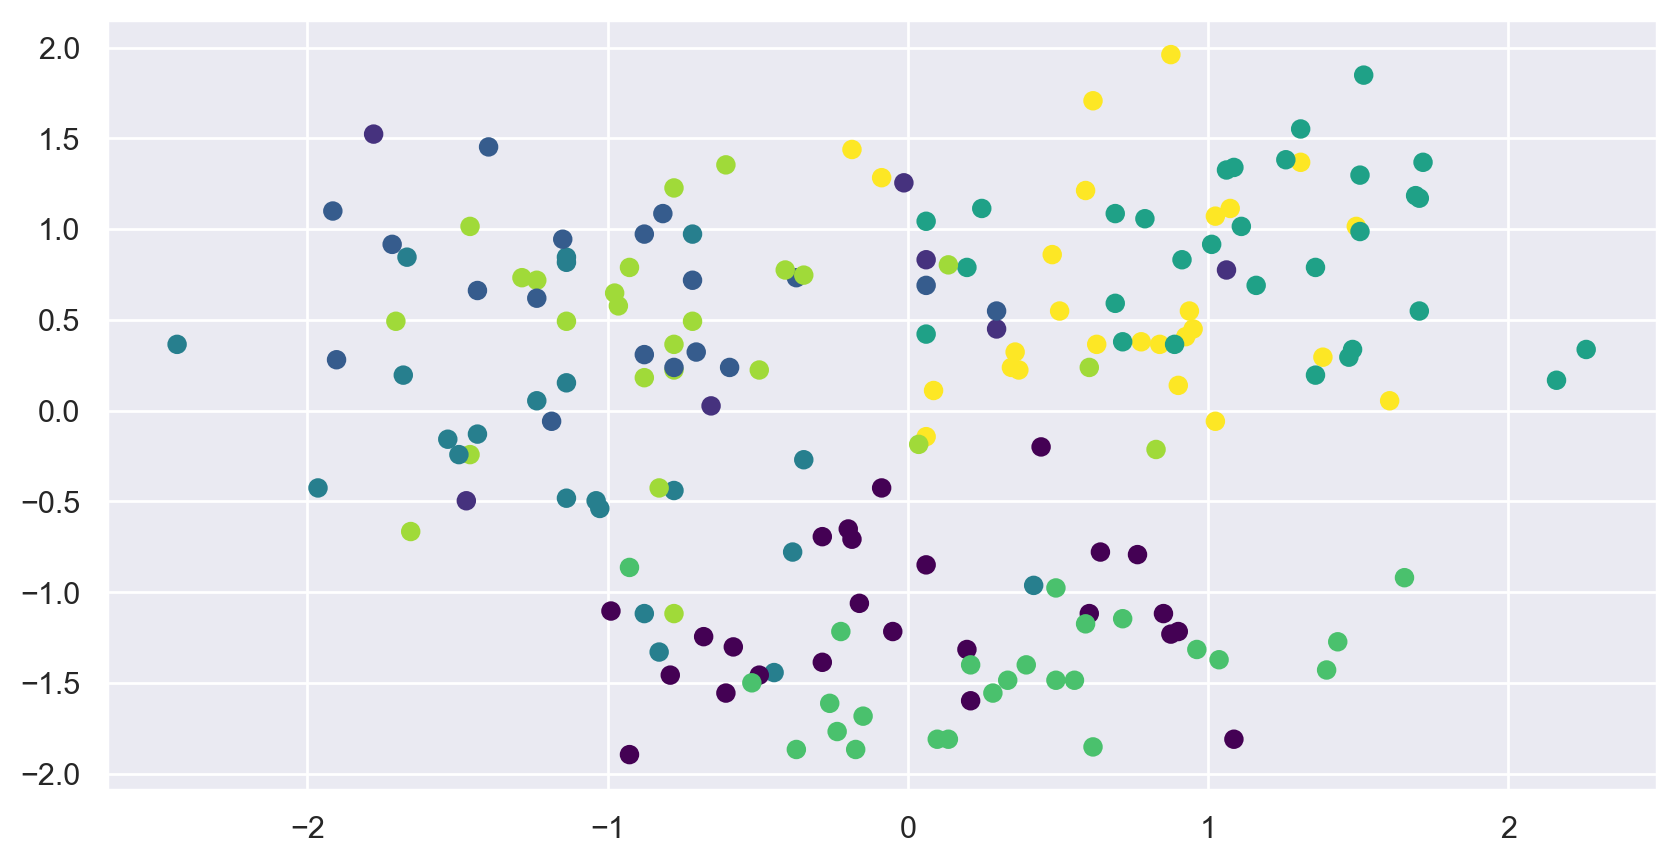

In [70]:
plt.scatter(x[:,1],x[:,12],c = yp, cmap='viridis')

In [71]:
km.inertia_  

948.5274146318345

In [72]:
#Hyperparameter Tuning

In [73]:
# Elbow graph 

In [74]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

C:\Users\Rajesh Gonnade\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [75]:
wcss

[2492.0,
 1723.1267750316524,
 1273.290195467508,
 1173.4059985341169,
 1099.6707454552354,
 1047.4415903857152,
 1000.7050137969351,
 956.5473466591939,
 901.9027393709905,
 863.5000918608987]

Text(0.5, 1.0, 'Elbow Graph')

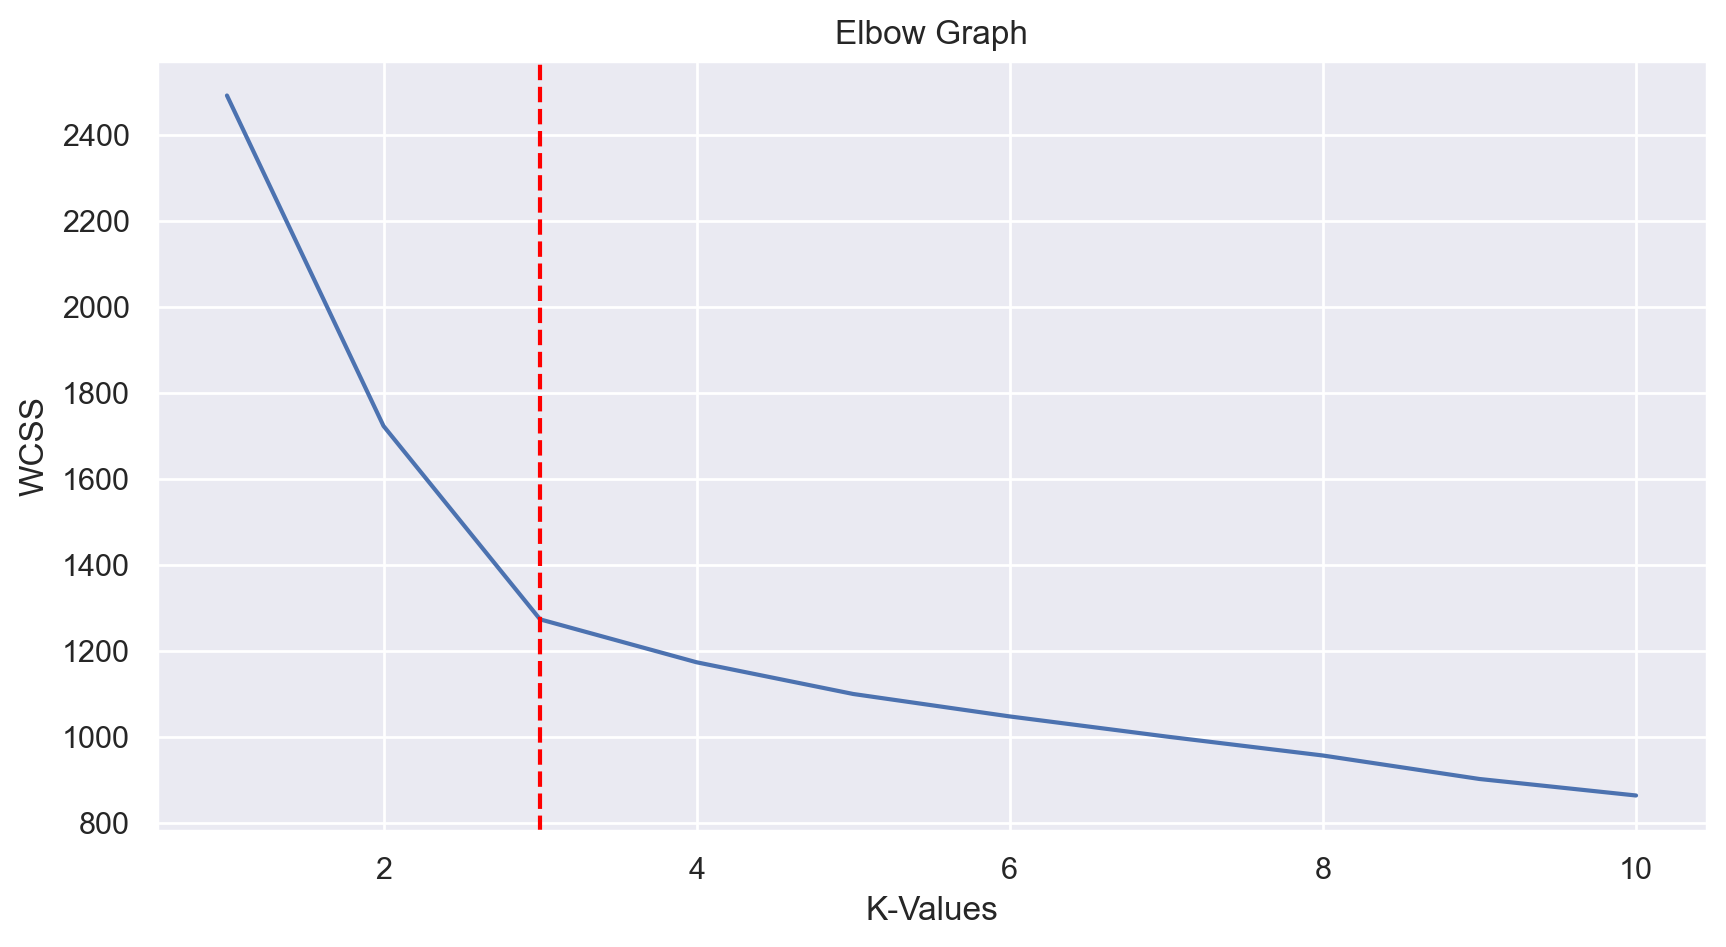

In [76]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [77]:
#Final Model
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [78]:
#Visualize the clusters
km.cluster_centers_

array([[ 1.34745816,  0.18654314,  0.91399834,  0.25849002,  0.59804187,
        -0.03459347, -0.988557  , -1.23619475,  0.71684172, -0.76000571,
         0.99030807, -1.19696611, -1.30153966, -0.38004461],
       [-1.17152057,  0.87809728, -0.30388549,  0.32222912, -0.68010466,
         0.58400654,  0.87650546,  0.94363903, -0.58558981,  0.59702379,
         0.18027959,  0.48895069,  0.76705349,  1.15834713],
       [ 0.07996036, -0.9221257 , -0.3860133 , -0.47532334,  0.17915195,
        -0.49896057, -0.07393442,  0.04428767,  0.0087608 ,  0.01208571,
        -0.87532574,  0.42390216,  0.24978206, -0.76524984]])

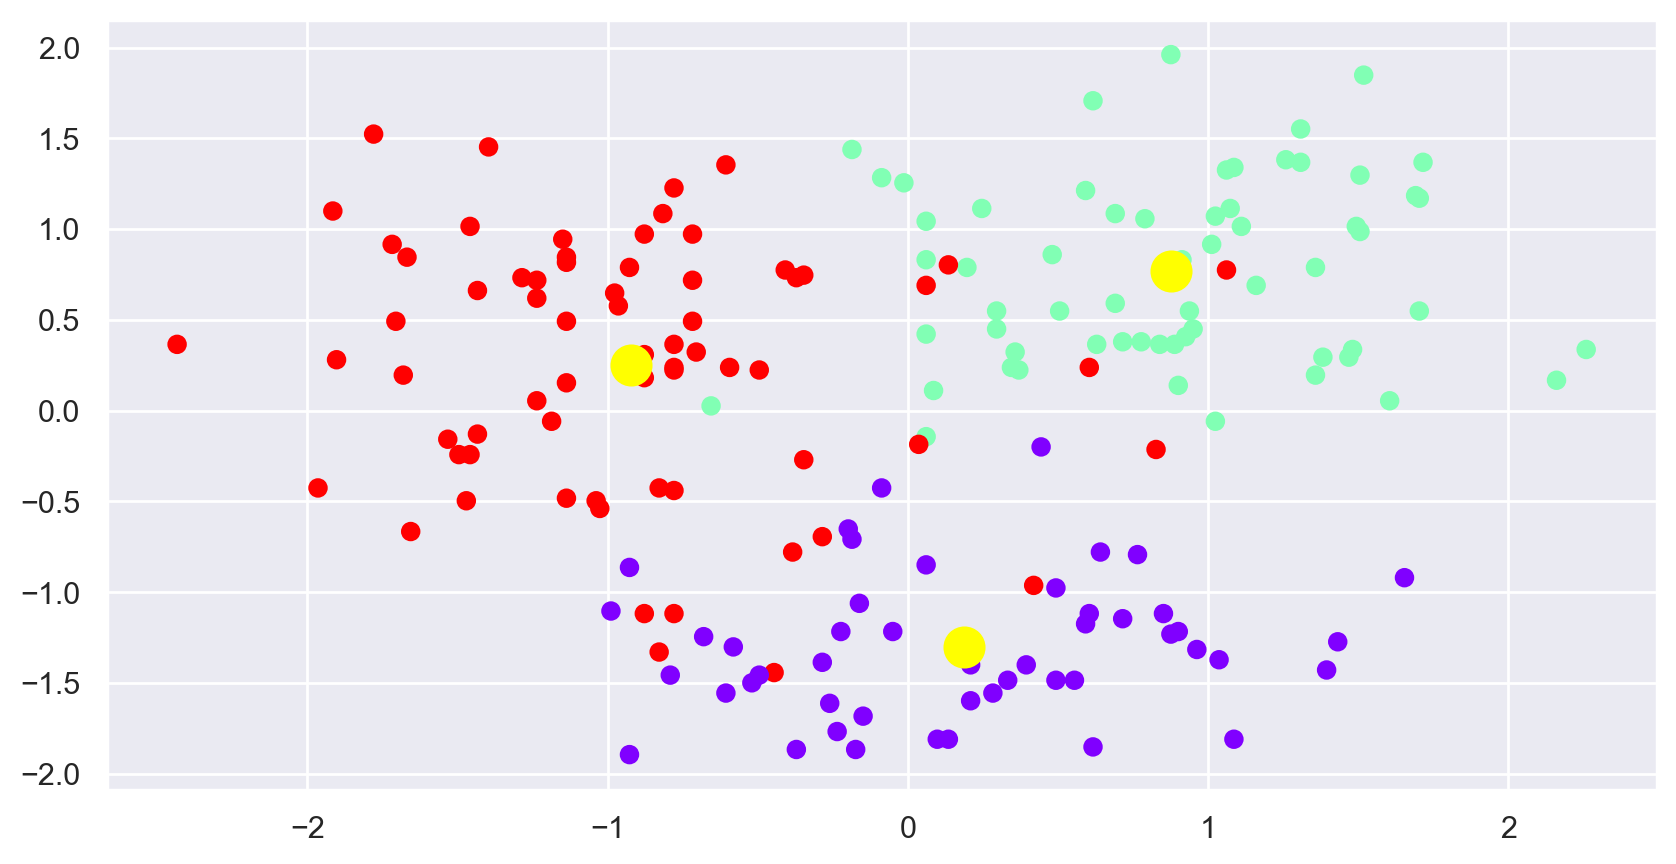

In [79]:
plt.scatter(x[:,1],x[:,12], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,12], c = 'yellow',s = 200)

In [80]:
#Analyzing clusters
df['cluster'] = ypred
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [81]:
df['cluster'].value_counts()

2    68
1    61
0    49
Name: cluster, dtype: int64

In [82]:
df.groupby('cluster').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
2,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235


In [83]:
#Evaluation of Kmeans
#Silhouette score

In [84]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred)

0.30813361977016307

In [85]:
'''
In hierarchical clustering, we obtained 4 clusters after applying PCA, while on the original data, we obtained 7 clusters. 
In K-means clustering, we obtained 3 clusters after applying PCA, and similarly, on the original data, we also obtained 3 clusters.
'''

'\nIn hierarchical clustering, we obtained 4 clusters after applying PCA, while on the original data, we obtained 7 clusters. \nIn K-means clustering, we obtained 3 clusters after applying PCA, and similarly, on the original data, we also obtained 3 clusters.\n'